In [32]:
import numpy as np 
import pandas as pd
import sklearn

In [12]:
df=pd.read_csv("spam.csv",encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df.shape

(5572, 5)

In [15]:
# we have to do first data cleaning
# EDA means we need to do analysis 
# text preprocessing 
# modal building 
#  evaluation of the modal 
# improvements 
# convert it into website 
# deploy the website

# 1. DATA CLEANING

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [22]:
# as u can see that we have many null values in the columns so clean it first

In [23]:
df["Unnamed: 2"].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
5567    True
5568    True
5569    True
5570    True
5571    True
Name: Unnamed: 2, Length: 5572, dtype: bool

In [28]:
# dropping the unnecessary columns 
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis="columns",inplace=True)

In [29]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# rename the columns 
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
# using the label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
# making the object 

In [34]:
df["target"]=encoder.fit_transform(df["target"])

In [36]:
df
# so spam is 0 and ham is 1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [38]:
# checking missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [39]:
# checking duplicates values
df.duplicated().sum()

403

In [40]:
# removeing the duplicates
df=df.drop_duplicates(keep="first")

In [41]:
df.duplicated().sum()

0

In [42]:
df.shape

(5169, 2)

# 2. EDA

In [44]:
# now we will do the analysis of the data for better understanding
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [52]:
import matplotlib.pyplot as plt

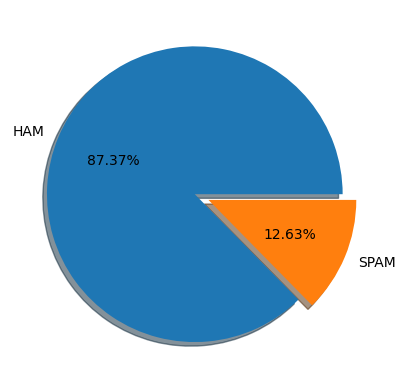

In [54]:
plt.pie(df['target'].value_counts(),labels=['HAM','SPAM'],autopct='%1.2f%%',shadow=True,explode=[0,0.1])
plt.show()

In [55]:
# as we can see that data is imbalanced 

In [59]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pranj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [62]:
# we will make the 3 columns 
df["num_characters"]=df["text"].apply(len)

C:\Users\pranj\AppData\Local\Temp\ipykernel_19848\1112143625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df["text"].apply(len)


In [63]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [66]:
# now making the column for fetching the number of words
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\pranj\AppData\Local\Temp\ipykernel_19848\2788682379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [67]:
# making the columns for the sentences 
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\pranj\AppData\Local\Temp\ipykernel_19848\3695610530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [70]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
# ham analysis 
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [74]:
# spam analysis 
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [75]:
# plotting the histogram for analysis 
import seaborn as sns 

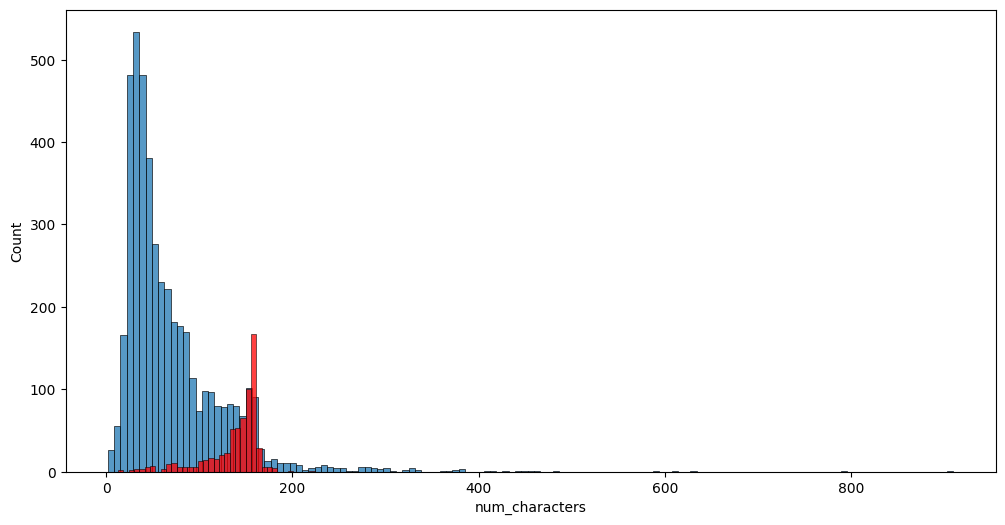

In [85]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color="red")
plt.show()

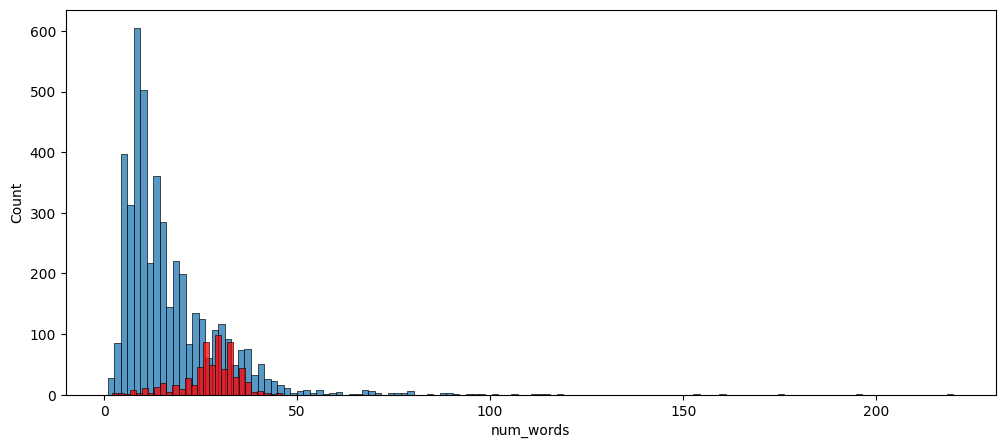

In [89]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")
plt.show()

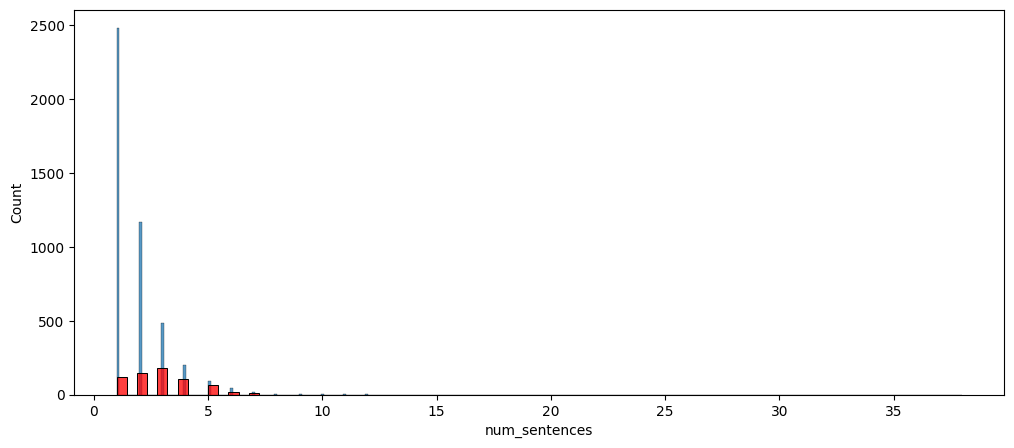

In [96]:
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"],color="red")
plt.show()

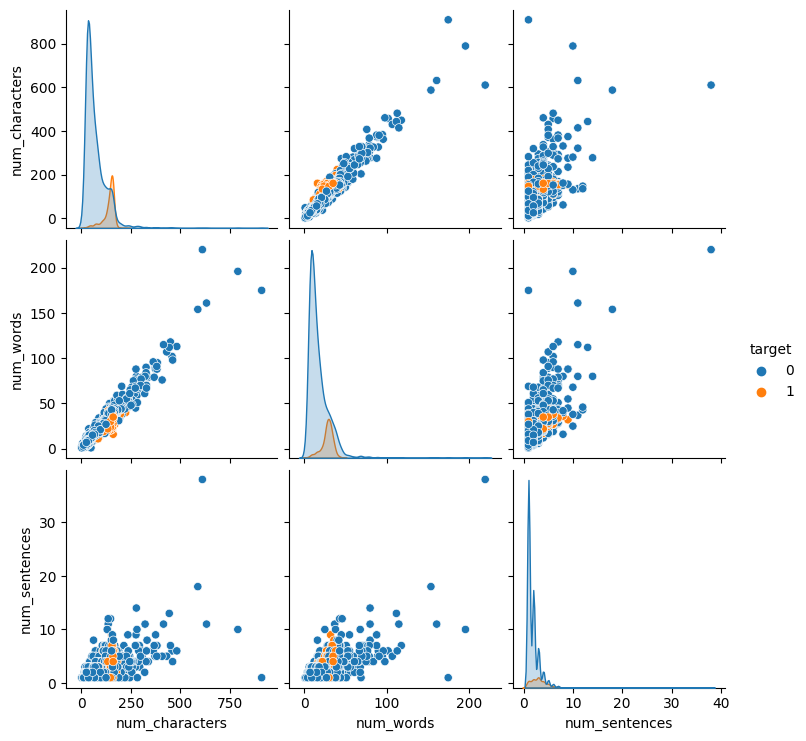

In [90]:
sns.pairplot(df,hue="target")

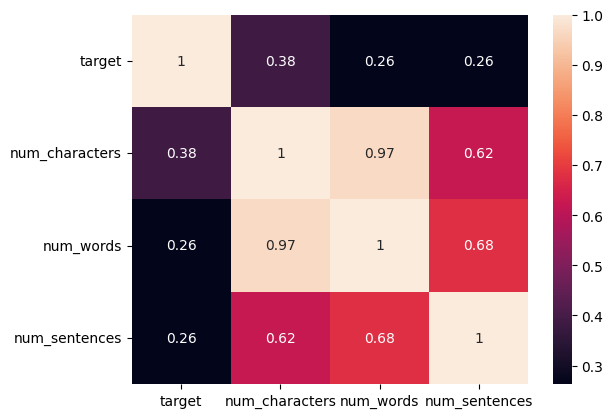

In [105]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# data preprocesing 
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation as they dont have meaning in sentence
- Stemming

In [129]:
# making a fucntion that will do all these in one step
def tranform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [117]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pranj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
# what are stopwords 
# they dont have any meaning in the sentences 
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")

# stemming means we are shortening the words

'love'

In [115]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [126]:
tranform_text("Did you like my presentation ml ?")

['like', 'presentation', 'ml']

In [132]:
tranform_text("I loved the YOUTUBE leactures on Machine Learning . How are you?")

'love youtub leactur machin learn'

In [133]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [135]:
tranform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [137]:
df["transformed_text"]=df["text"].apply(tranform_text)

C:\Users\pranj\AppData\Local\Temp\ipykernel_19848\1080827165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(tranform_text)


In [138]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# wordcloud 

In [139]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
   --------------------- ------------------ 81.9/152.1 kB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 81.9/152.1 kB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 81.9/152.1 kB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 81.9/152.1 kB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 81.9/152.1 kB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 81.9/152.1 kB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 81.9/152.1 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- 152.1/152.1 kB 395.1 kB/s eta 0:00:00


In [141]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

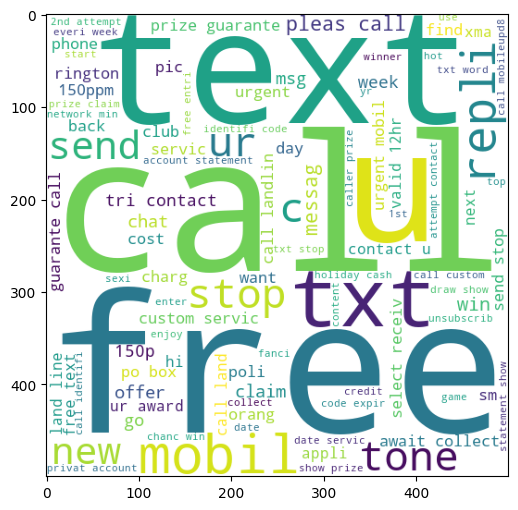

In [152]:
# SPAM WORDCLOUD

plt.figure(figsize=(15,6))

spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

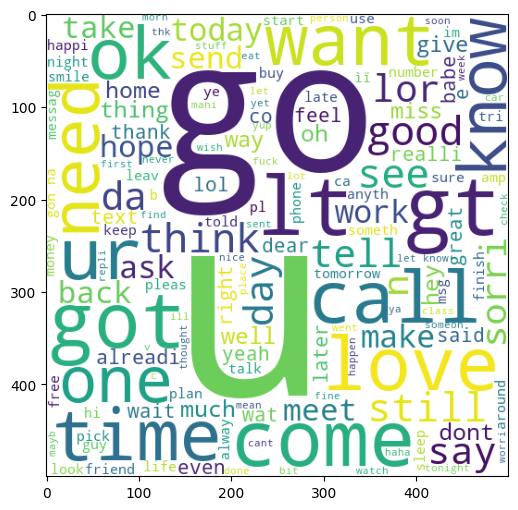

In [151]:
# HAM WORDCLOUD

plt.figure(figsize=(15,6))

ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

In [154]:
# finding the top 30 words of the ham and spam 
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [166]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        # appending all the words in the spam_corpus

In [163]:
len(spam_corpus)

9939

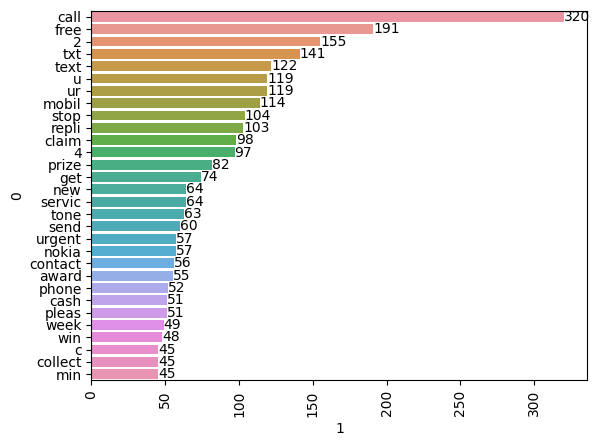

In [176]:
from collections import Counter
ax=sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],orient="h")
# it will create a dictionary that will generate the count of the words occurence
ax.bar_label(ax.containers[0])
plt.xticks(rotation="vertical")
plt.show()

In [177]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        # appending all the words in the spam_corpus

In [178]:
len(ham_corpus)

35404

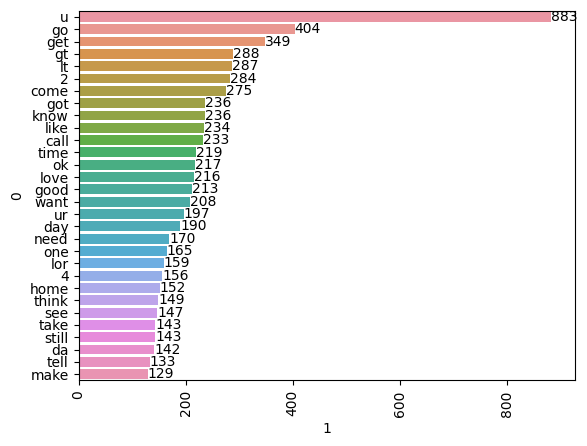

In [179]:
from collections import Counter
ax=sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],orient="h")
# it will create a dictionary that will generate the count of the words occurence
ax.bar_label(ax.containers[0])
plt.xticks(rotation="vertical")
plt.show()

# modal building

In [182]:
# the modal will be naive bayes as it is better for textual data
# the best algorithm for textual data is naive bayes

In [183]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [256]:
# first we need to convert the text into vectors 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=3000)

In [257]:
X=tfid.fit_transform(df["transformed_text"]).toarray()

In [258]:
X.shape

(5169, 3000)

In [259]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [260]:
y=df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [261]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [262]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score 
gnb=GaussianNB()
mnb=MultinomialNB()
bnp=BernoulliNB()

In [263]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [264]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [255]:
bnp.fit(X_train,y_train)
y_pred3=bnp.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [245]:
# since precission score matters most so we will select multinomial naive bayes
# tfidf --> mnb

In [266]:

import pickle
pickle.dump(tfid,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))